In [2]:
import torch
from torch.utils.data import DataLoader
import numpy as np 
import pandas as pd
import cv2
import matplotlib.pyplot as plt
import albumentations as A
from albumentations.pytorch import ToTensorV2
from torchvision import transforms
from dataset import PascalPartDataset

ModuleNotFoundError: No module named 'dataset'

In [2]:
df_train_paths = pd.DataFrame({'PATH_TO_IMAGE': [], 'PATH_TO_MASK': []})
df_val_paths = pd.DataFrame({'PATH_TO_IMAGE': [], 'PATH_TO_MASK': []})

# extract names of images and masks for train and val splts
splits = ["train_id", "val_id"]
splits_samples = {}

for split in splits:
    with open(f'/storage/AIDA_PROJECTS/egor.koptelov/MIL_test_task/hierarchical_segmentation/data/{split}.txt') as f:
        splits_samples[split] = f.read().splitlines()

path_to_raw = '/storage/AIDA_PROJECTS/egor.koptelov/MIL_test_task/Pascal-part/Pascal-part'

# create dataframes with full paths to images and masks
df_train_paths['PATH_TO_IMAGE'] = [f'{path_to_raw}/JPEGImages/{id_img}.jpg' for id_img in splits_samples['train_id']]
df_train_paths['PATH_TO_MASK'] = [f'{path_to_raw}/gt_masks/{id_mask}.npy' for id_mask in splits_samples['train_id']]
df_val_paths['PATH_TO_IMAGE'] = [f'{path_to_raw}/JPEGImages/{id_img}.jpg' for id_img in splits_samples['val_id']]
df_val_paths['PATH_TO_MASK'] = [f'{path_to_raw}/gt_masks/{id_mask}.npy' for id_mask in splits_samples['val_id']]

In [3]:
# # Create the validation dataset and dataloader
# val_dataset = PascalPartDataset(df_val_paths, transform=transform)
# val_loader = DataLoader(val_dataset, batch_size=1, shuffle=False)

# train_dataset = PascalPartDataset(df_train_paths, transform=transform)
# train_loader = DataLoader(train_dataset, batch_size=1, shuffle=False)

In [12]:
transform = A.Compose([
        A.OneOf([
            A.MotionBlur(p=.2),
            A.MedianBlur(blur_limit=3, p=0.1),
            A.Blur(blur_limit=3, p=0.1),
            A.GaussianBlur(p=0.5, blur_limit=(3, 7), sigma_limit=(0.0, 0)),
        ], p=0.5),

        A.OneOf([
            A.ColorJitter(p=0.3),
            A.Defocus(p=0.3, radius=(3, 5)),
            A.RandomBrightnessContrast(p=0.5, brightness_limit=(-0.2, 0.2), contrast_limit=(-0.2, 0.2), brightness_by_max=True),
            A.RandomFog(p=0.5, fog_coef_lower=0.1, fog_coef_upper=0.22, alpha_coef=0.23)
        ], p=0.5),

        A.HorizontalFlip(p=0.5),
        A.Emboss(p=0.5, alpha=(0.2, 0.5), strength=(0.2, 0.7))
        # A.Blur(p=0.5),
        # A.ColorJitter(p=0.3),
        # A.Defocus(p=0.3, radius=(3, 5)),
        # A.MedianBlur(p=0.5, blur_limit=(3, 7)),
        # A.MotionBlur(p=0.5, blur_limit=(3, 7), allow_shifted=True),
        # A.RandomBrightnessContrast(p=0.5, brightness_limit=(-0.2, 0.2), contrast_limit=(-0.2, 0.2), brightness_by_max=True),
        # A.RandomFog(p=0.5, fog_coef_lower=0.1, fog_coef_upper=0.22, alpha_coef=0.23)

    ])

/storage/AIDA_PROJECTS/egor.koptelov/MIL_test_task/Pascal-part/Pascal-part/JPEGImages/2008_000003.jpg
/storage/AIDA_PROJECTS/egor.koptelov/MIL_test_task/Pascal-part/Pascal-part/gt_masks/2008_000003.npy
/storage/AIDA_PROJECTS/egor.koptelov/MIL_test_task/Pascal-part/Pascal-part/JPEGImages/2008_000008.jpg
/storage/AIDA_PROJECTS/egor.koptelov/MIL_test_task/Pascal-part/Pascal-part/gt_masks/2008_000008.npy
/storage/AIDA_PROJECTS/egor.koptelov/MIL_test_task/Pascal-part/Pascal-part/JPEGImages/2008_000026.jpg
/storage/AIDA_PROJECTS/egor.koptelov/MIL_test_task/Pascal-part/Pascal-part/gt_masks/2008_000026.npy
/storage/AIDA_PROJECTS/egor.koptelov/MIL_test_task/Pascal-part/Pascal-part/JPEGImages/2008_000034.jpg
/storage/AIDA_PROJECTS/egor.koptelov/MIL_test_task/Pascal-part/Pascal-part/gt_masks/2008_000034.npy


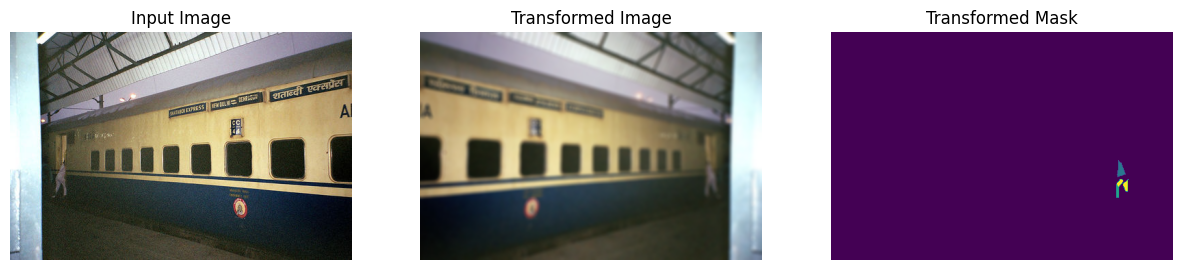

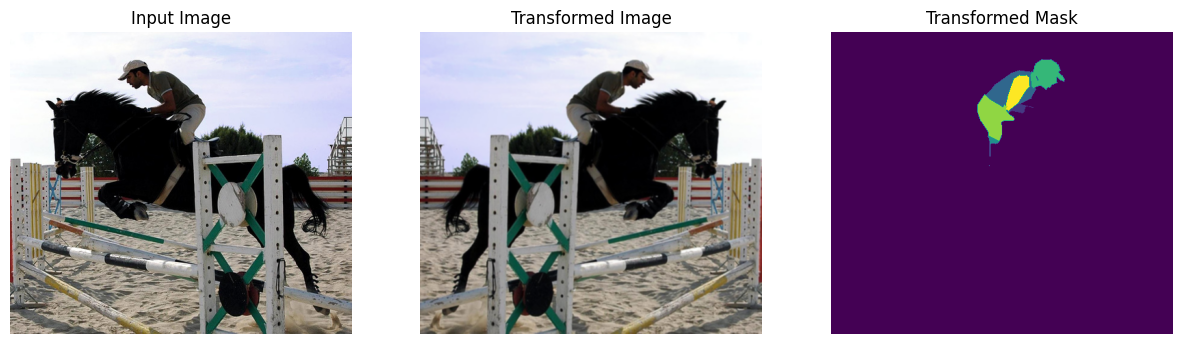

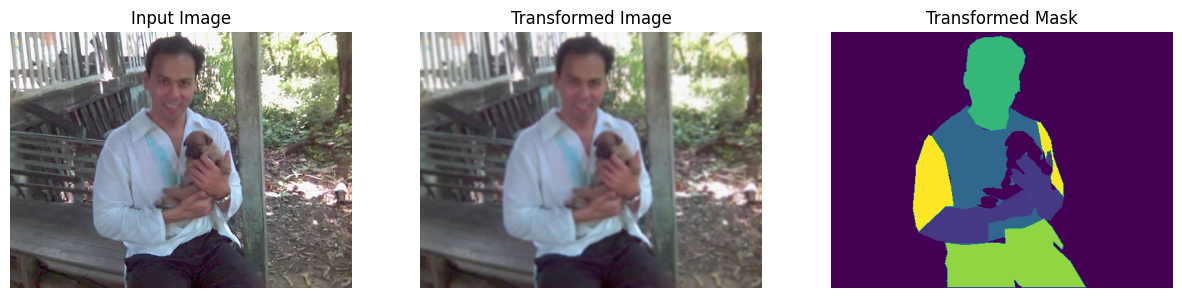

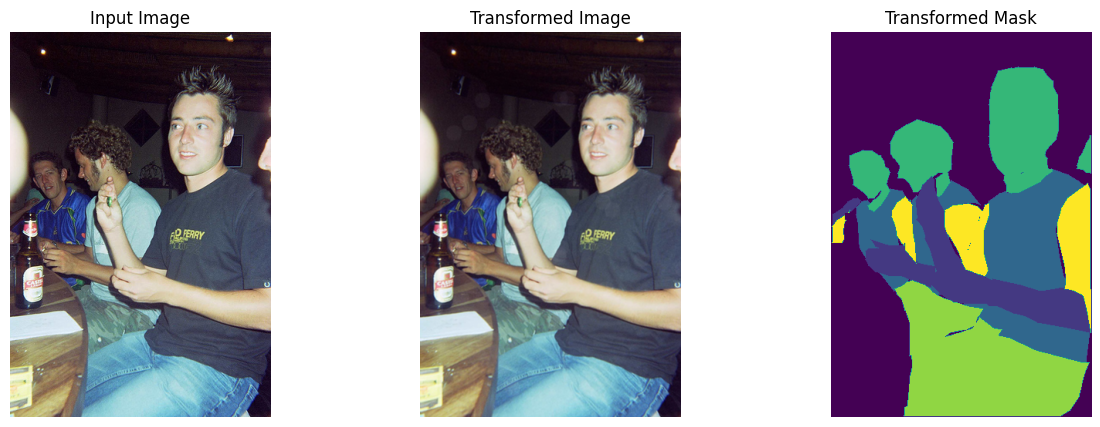

In [15]:
for i in range(len(df_train_paths)):
    path_image, path_mask = df_train_paths.iloc[i].values
    
    # Load the mask
    mask = np.load(path_mask)

    # Load the image
    image = cv2.imread(path_image)
    # Convert image to RGB tesnsor
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

    # apply transforms
    transformed = transform(image=image, mask=mask)

    print(path_image)
    print(path_mask)
    
    plt.figure(figsize=(15, 5))
    
    plt.subplot(1, 3, 1)
    plt.title('Input Image')
    plt.imshow(image)
    plt.axis('off')

    plt.subplot(1, 3, 2)
    plt.title('Transformed Image')
    plt.imshow(transformed['image'])
    plt.axis('off')

    
    plt.subplot(1, 3, 3)
    plt.title('Transformed Mask')
    plt.imshow(transformed['mask'])
    plt.axis('off')


    
    if i > 2:
        break



In [14]:
root_augmented_data = f'/storage/AIDA_PROJECTS/egor.koptelov/MIL_test_task/Pascal-part'

In [25]:
from tqdm import tqdm

In [26]:
for i in tqdm(range(len(df_train_paths))):
    path_image, path_mask = df_train_paths.iloc[i].values
    
    # Load the mask
    mask = np.load(path_mask)

    # Load the image
    image = cv2.imread(path_image)
    # Convert image to RGB tesnsor
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

    # apply transforms
    transformed = transform(image=image, mask=mask)


    image_id = path_image.split('/')[-1]
    mask_id = path_mask.split('/')[-1]
    # save augmented image
    cv2.imwrite(f'{root_augmented_data}/augmented_train_samples/JPEGImages/{image_id}', transformed['image'])
    # save augmented mask
    np.save(f'{root_augmented_data}/augmented_train_samples/gt_masks/{mask_id}', transformed['mask'])

    
    


100%|██████████| 2826/2826 [00:39<00:00, 71.41it/s] 


### Hold out images with big masks (>10% of whole image size)